In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
powertracker_df = {k: pd.read_csv("series_powertracker_%s.csv" % k) for k in range(2, 8)}

In [33]:
for k, df in powertracker_df.items():
    df["depth"] = k - 1
    df["origin"] = "powertracker"
powertracker = pd.concat(powertracker_df.values())    

In [34]:
noinfo_df = {k: pd.read_csv("series_estimation_%s_noinfo.csv" % k) for k in range(2, 8)}
for k, df in noinfo_df.items():
    df["depth"] = k - 1
    df["origin"] = "noinfo"
noinfo = pd.concat(noinfo_df.values())

In [35]:
route_df = {k: pd.read_csv("series_estimation_%s_route.csv" % k) for k in range(2, 8)}
# We know that the node at 1-hop will find a gateway always on
# therefore repeat_sender = 1 should be the value here instead of 3.76.
route_df[2]["tx"] = route_df[2].tx / 3.76

for k, df in route_df.items():
    df["depth"] = k - 1
    df["origin"] = "route"
route = pd.concat(route_df.values())

In [36]:
df = pd.concat([powertracker, noinfo, route])
datetime_index = pd.DatetimeIndex(pd.to_datetime(df["time"], unit="s"))
df.set_index(datetime_index, inplace=True)

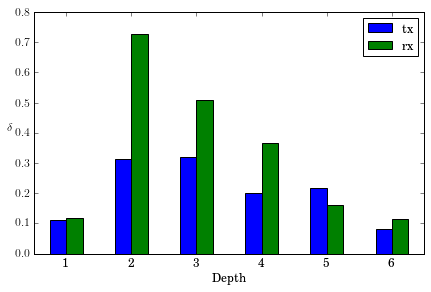

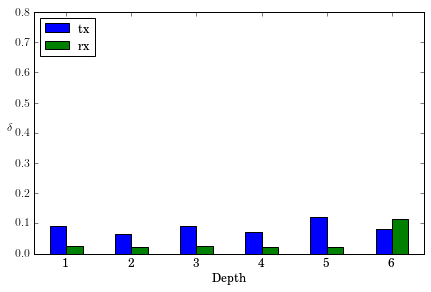

In [44]:
# ratio par profondeur

df_max_powertracker = df[df.origin == "powertracker"][["tx", "rx", "depth"]].groupby(["depth"]).max()
df_max_noinfo = df[df.origin == "noinfo"][["tx", "rx", "depth"]].groupby(["depth"]).max()
df_max_route = df[df.origin == "route"][["tx", "rx", "depth"]].groupby(["depth"]).max()

fig = plt.figure()
ax = fig.add_subplot(111)
(df_max_route / df_max_powertracker).plot(kind="bar",ax=ax, legend=False)
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels)
ax.set_xticklabels(list(range(1, 7)), rotation=0)
ax.set_xlabel("Depth")
ax.set_ylabel("$\delta$", rotation=0)
fig.savefig("global_route.pdf", bbox_inches='tight')

fig = plt.figure()
ax = fig.add_subplot(111)
(df_max_noinfo / df_max_powertracker).plot(kind="bar", ax=ax, legend=False)
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper left')
ax.set_xticklabels(list(range(1, 7)), rotation=0)
ax.set_xlabel("Depth")
ax.set_ylabel("$\delta$", rotation=0)
ax.set_ylim((0, 0.8))
fig.savefig("global_noinfo.pdf", bbox_inches='tight')

In [16]:
from math import sqrt
import matplotlib

def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    #MAX_HEIGHT_INCHES = 10
    #if fig_height > MAX_HEIGHT_INCHES:
    #    print("WARNING: fig_height too large:" + fig_height + 
    #          "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
    #    fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 12, # fontsize for x and y labels (was 12)
              'axes.titlesize': 12,
              'text.fontsize': 12, # was 12
              'legend.fontsize': 12, # was 12
              'xtick.labelsize': 12,
              'ytick.labelsize': 12,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)
latexify(fig_width=7)

/home/sieben/.local/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [17]:
if False:
    f, axarr = plt.subplots(2, 3, sharex='col', sharey='row')
    depth = 1
    ((noinfo_binned[depth] - real_binned[depth])/ real_binned[depth]).plot(kind="bar", ax=axarr[0, 0])
    depth = 2
    ((noinfo_binned[depth] - real_binned[depth])/ real_binned[depth]).plot(kind="bar", ax=axarr[0, 1])
    depth = 3
    ((noinfo_binned[depth] - real_binned[depth])/ real_binned[depth]).plot(kind="bar", ax=axarr[0, 2])
    depth = 4
    ((noinfo_binned[depth] - real_binned[depth])/ real_binned[depth]).plot(kind="bar", ax=axarr[1, 0])
    depth = 5
    ((noinfo_binned[depth] - real_binned[depth])/ real_binned[depth]).plot(kind="bar", ax=axarr[1, 1])
    depth = 6
    ((noinfo_binned[depth] - real_binned[depth])/ real_binned[depth]).plot(kind="bar", ax=axarr[1, 2])
    f.savefig("evolution_noinfo.pdf")

-c:8: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
-c:12: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
-c:16: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


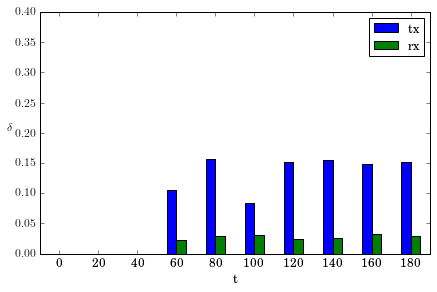

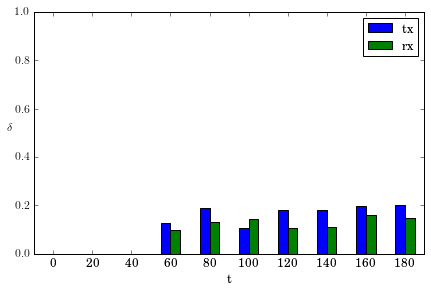

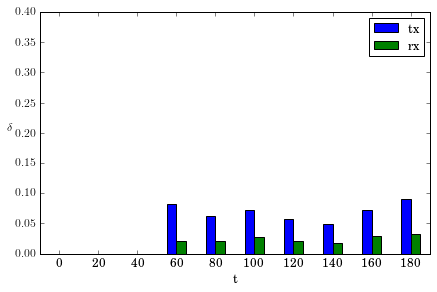

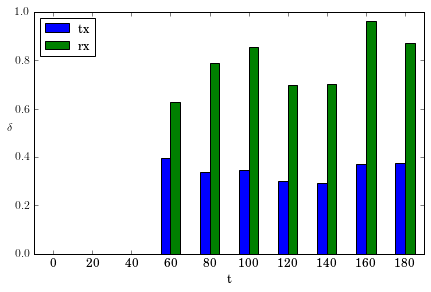

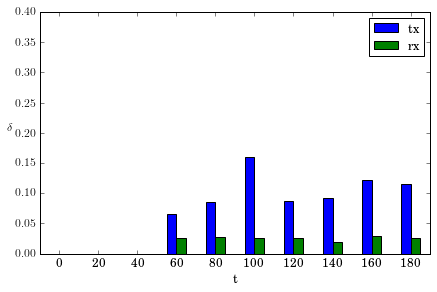

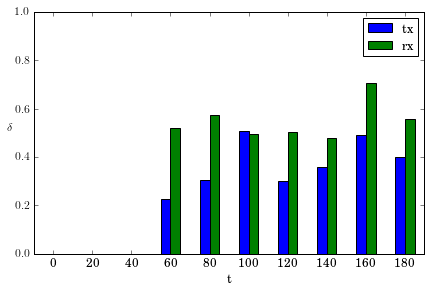

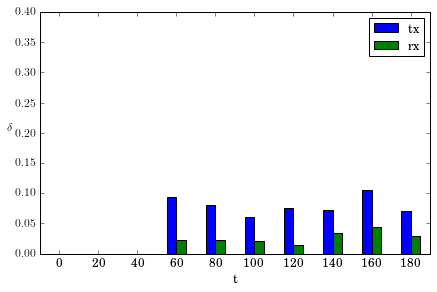

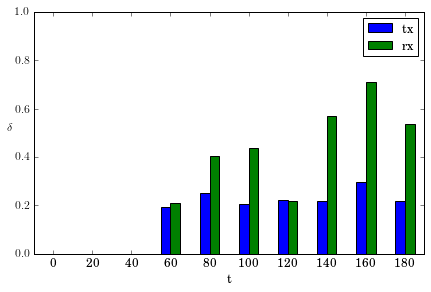

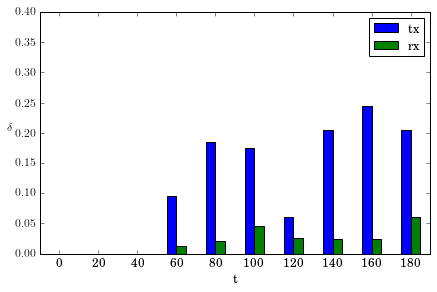

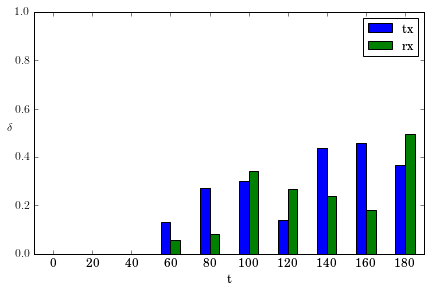

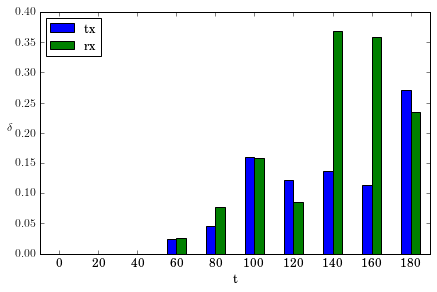

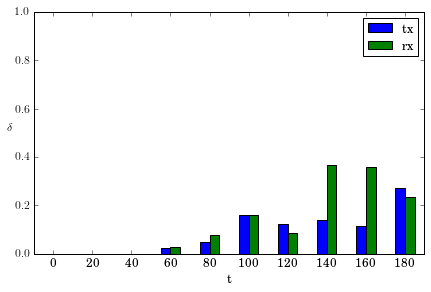

In [43]:
sample_rate = "20s"
# of course, xticks depends on sample_rate
xticks = [i for i in range(0, 200, 20)]


real_binned = {k: df[["tx", "rx"]][
            (df["depth"] == k) & (df["origin"] == "powertracker")].resample(sample_rate).diff() 
               for k in range(1,8)}

noinfo_binned = {k: df[["tx", "rx"]][
            (df["depth"] == k) & (df["origin"] == "noinfo")].resample(sample_rate).diff() 
               for k in range(1,8)}

route_binned = {k: df[["tx", "rx"]][
            (df["depth"] == k) & (df["origin"] == "route")].resample(sample_rate).diff() 
               for k in range(1,8)}


for depth in range(1, 7):
    # Noinfo
    fig = plt.figure()
    ax = fig.add_subplot(111)
    (noinfo_binned[depth] / real_binned[depth]).plot(kind="bar",ax=ax)
    ax.set_xticklabels(xticks, rotation=0)
    ax.set_ylabel("$\delta$", rotation=0)
    ax.set_ylim((0, 0.4))
    ax.set_xlabel("t")
    fig.savefig("evolution_noinfo_%s.pdf" % depth,  bbox_inches='tight')
        
    # Route
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax = (route_binned[depth]/ real_binned[depth]).plot(kind="bar", ax=ax)
    ax.set_xticklabels(xticks, rotation=0)
    ax.set_ylabel("$\delta$", rotation=0)
    ax.set_ylim((0, 1))
    ax.set_xlabel("t")
    fig.savefig("evolution_route_%s.pdf" % depth,  bbox_inches='tight')

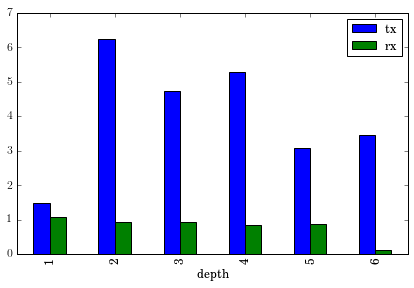

In [19]:
df[df.origin == "powertracker"].groupby("depth").max()[["tx", "rx"]].plot(kind="bar")

In [20]:
depth = 2; ((real_binned[depth] - noinfo_binned[depth])/ real_binned[depth])

,tx,rx
1970-01-01 00:00:00,NaN,NaN
1970-01-01 00:00:20,NaN,NaN
1970-01-01 00:00:40,NaN,NaN
1970-01-01 00:01:00,0.917254,0.979620
1970-01-01 00:01:20,0.937720,0.978801
1970-01-01 00:01:40,0.928336,0.972942
1970-01-01 00:02:00,0.943039,0.980022
1970-01-01 00:02:20,0.950394,0.983348
1970-01-01 00:02:40,0.927125,0.971084
1970-01-01 00:03:00,0.910417,0.968209


In [21]:
df_max_powertracker = df[df.origin == "powertracker"][["tx", "rx", "depth"]].groupby(["depth"]).max()
df_max_noinfo = df[df.origin == "noinfo"][["tx", "rx", "depth"]].groupby(["depth"]).max()
df_max_route = df[df.origin == "route"][["tx", "rx", "depth"]].groupby(["depth"]).max()

In [31]:
df_max_powertracker

,tx,rx
depth,,
1,1.490837,1.068145
2,6.221493,0.922948
3,4.722379,0.941132
4,5.291066,0.843023
5,3.083423,0.878003
6,3.455043,0.124668
